# Análisis Demográfico y Comportamental de Usuarios en Redes Sociales

Objetivo: Explorar y comprender los patrones demográficos y comportamentales de los usuarios en la red social, incluyendo la distribución de género, edades, comportamiento de compra y su relación con variables como el salario estimado. Este análisis busca proporcionar insights fundamentales para optimizar estrategias de marketing y mejorar la segmentación de la audiencia en la plataforma.



# Importacion

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Obtiene el directorio actual
directorio_actual = os.getcwd()

# Nombre del archivo CSV que se desea abrir
nombre_archivo = "Social_Network_Ads.csv"

# Se Construye la ruta completa del archivo utilizando os.path.join
ruta_completa = os.path.join(directorio_actual, nombre_archivo)

# Verifico si el archivo existe antes de intentar abrirlo
if os.path.exists(ruta_completa):
    # Abre el archivo CSV utilizando pandas
    df = pd.read_csv(ruta_completa)

else:
    print(f"El archivo {nombre_archivo} no existe en el directorio actual.")

In [10]:
type(df)

pandas.core.frame.DataFrame

In [2]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Explorando los datos (EDA)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [11]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [14]:
df.duplicated().any()

False

In [15]:
df.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

# Analizando Datos

¿Cuántos usuarios realizaron una compra (Purchased = 1) y cuántos no la realizaron (Purchased = 0)?

In [19]:
# Contar el número de usuarios que realizaron una compra (Purchased = 1)
usuarios_compradores = df['Purchased'].value_counts()[1]

# Contar el número de usuarios que no realizaron una compra (Purchased = 0)
usuarios_no_compradores = df['Purchased'].value_counts()[0]

print("Usuario que realizaron una compra: ",usuarios_compradores)
print("Usuario que no realizaron una compra: ",usuarios_no_compradores)

Usuario que realizaron una compra:  143
Usuario que no realizaron una compra:  257


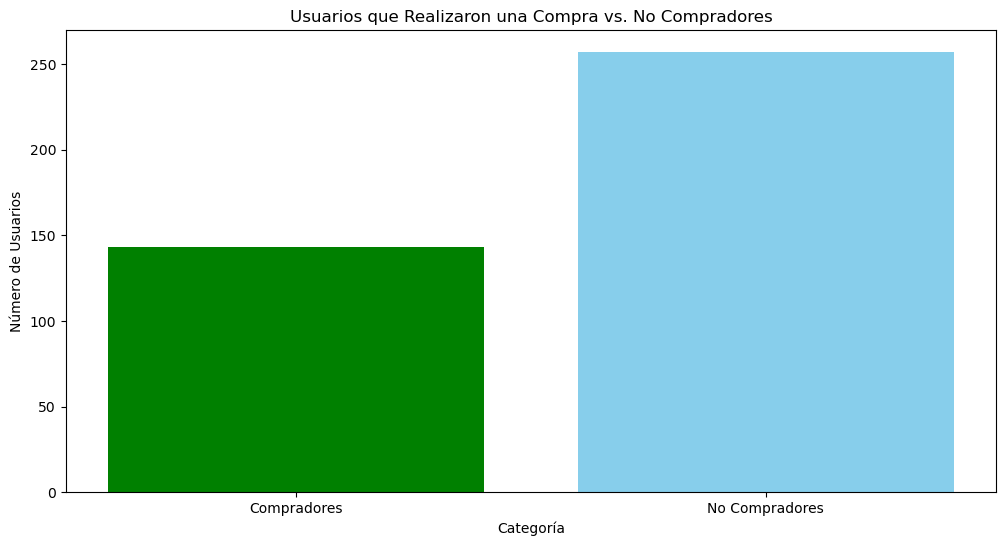

In [26]:
# Creo un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(['Compradores', 'No Compradores'], [usuarios_compradores, usuarios_no_compradores], color=['green', 'skyblue'])
plt.title('Usuarios que Realizaron una Compra vs. No Compradores')
plt.xlabel('Categoría')
plt.ylabel('Número de Usuarios')
plt.show()

¿Cuál es la distribución de género entre los usuarios?

In [29]:
distribucion_de_genero = df['Gender'].value_counts()

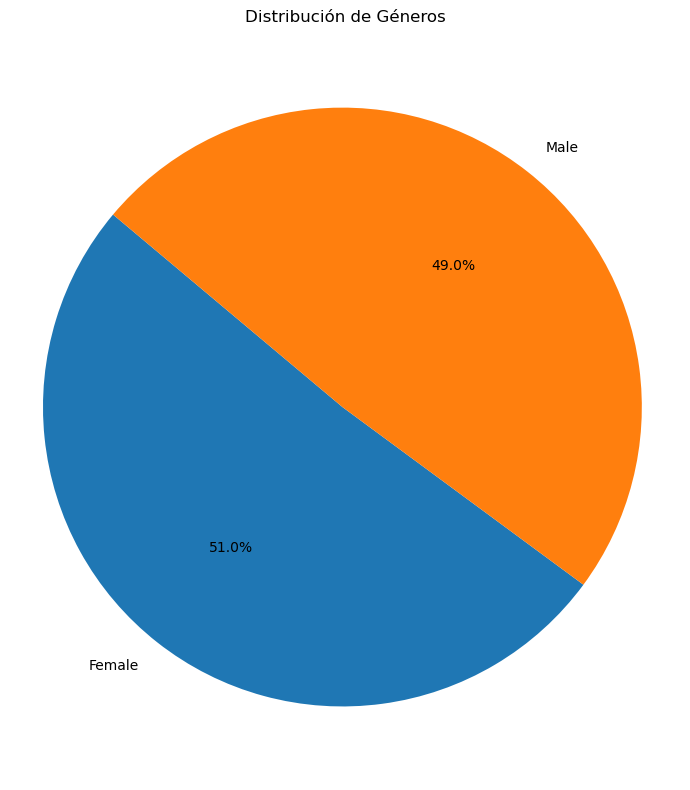

In [33]:
# Visualiza los resultados (gráfico circular)
plt.figure(figsize = (7,8))
plt.pie(distribucion_de_genero,labels = distribucion_de_genero.index,autopct = '%1.1f%%',startangle=140)
plt.title('Distribución de Géneros')
plt.axis('equal')
plt.tight_layout()
plt.show()

¿Cuál es la distribución de edades de los usuarios?

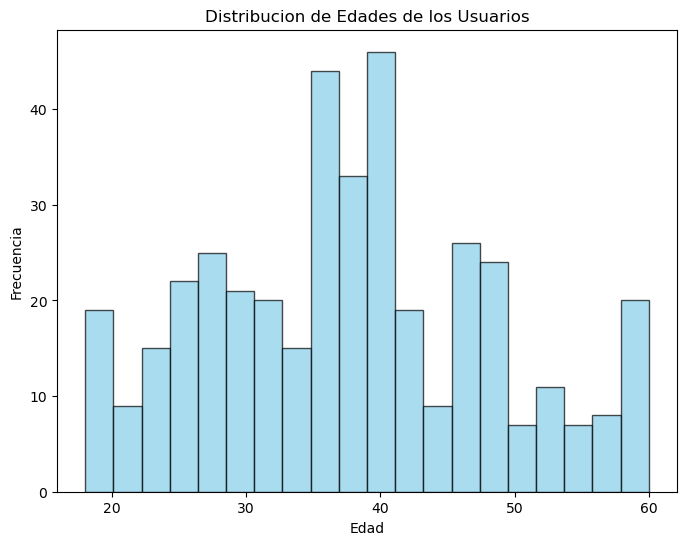

In [36]:
# Histograma de distribución de edades
plt.figure(figsize=(8, 6))
plt.hist(df['Age'],bins = 20,color = 'skyblue',edgecolor='black',alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Edades de los Usuarios')
plt.show()

¿Cuál es el salario estimado promedio de los usuarios que realizaron una compra?

In [66]:
salario_promedio = df[df['Purchased'] == 1]['EstimatedSalary'].mean()

print("Salario estimado promedio de los usuarios que realizaron una compra:",salario_promedio)

Salario estimado promedio de los usuarios que realizaron una compra: 86272.72727272728


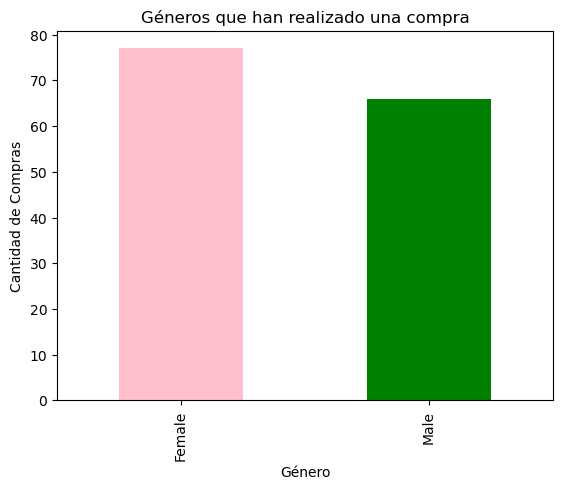

In [74]:
# Dato Adicional: Género que ha realizado una compra
genero_compras = df[df['Purchased'] == 1].groupby('Gender').size()

genero_compras.plot(kind='bar', color=['pink', 'green'])
plt.xlabel('Género')
plt.ylabel('Cantidad de Compras')
plt.title('Géneros que han realizado una compra')

# Cambiar los índices del eje x por las categorías de género
plt.xticks(range(len(genero_compras.index)), genero_compras.index)

plt.show()


¿Hay alguna relación entre la edad y la probabilidad de compra?

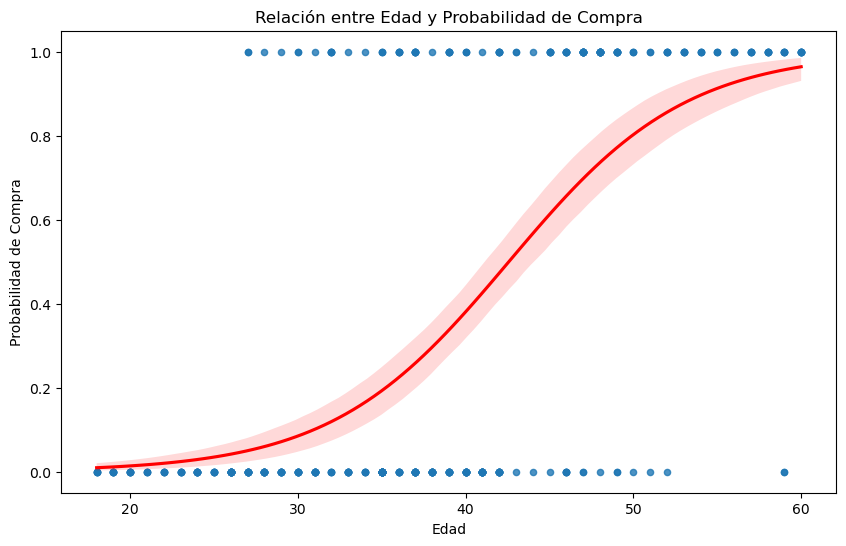

In [77]:
import seaborn as sns

# Creo un gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Purchased', data=df, logistic=True, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Relación entre Edad y Probabilidad de Compra')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Compra')
plt.show()


El gráfico de dispersión con la línea de regresión logística muestra la relación entre la edad y la probabilidad de compra. Cada punto en el gráfico representa la edad de un usuario en el eje x y su correspondiente probabilidad de compra en el eje y. La línea roja de regresión logística muestra la tendencia general de cómo la probabilidad de compra cambia con la edad según el modelo estadístico aplicado. Esta visualización ayuda a comprender si existe alguna asociación entre la edad de los usuarios y la probabilidad de que realicen una compra, lo que puede ser valioso para la segmentación y personalización de estrategias de marketing.